# Loading Important Libraries

In [2]:
%matplotlib inline
import numpy as np
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
# Loading Ones and Zeros only
X, y = load_digits(n_class=2, return_X_y=True)

In [8]:
# Viewing the dataset
print(X.shape)

(360, 64)


In [9]:
num_samples = X.shape[0]
image_size = X.shape[1]

In [10]:
# Printing first image of given dataset
print(X[0])

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


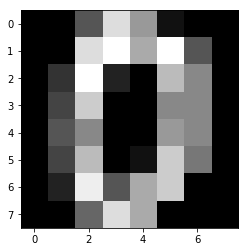

In [11]:
plt.imshow(X[0].reshape(8, 8), cmap=plt.cm.gray)

In [27]:
# Creating weight vector [without bias or Theta_0]
W = np.ones(image_size)

In [22]:
# Sigmoid function [non-optimized, overflow might occur]
def _sigmoid(z):
    return 1.0 / (1 + math.exp(-z))

In [23]:
# Function for prediction
def _predict(x, w):
    _sum = 0
    for _x, _w in zip(x, w):
        _sum += _x * _w
    return _sigmoid(_sum)

In [24]:
# Function for computing loss
def _computeCost(X, W, y):
    # Number of data / rows
    m = len(X)
    
    #loss [obvious!]
    loss = []
    
    # Computing the prediction
    yHat = [_predict(X[i], W) for i in range(m)]
    
    # Clipping the prediction between 0.01 and 0.99 to avoid 'divide by zero'
    for i, _y in enumerate(yHat):
        if (_y == 1):
            yHat[i] = 0.99
        elif (_y == 0):
            yHat[i] = 0.01
        else:
            pass
    
    # Computing the loss using log-loss 
    for _y, _yHat in zip(y, yHat):
        log_loss = _y * math.log(_yHat) + (1 - _y) * math.log(1 - _yHat)
        loss.append(log_loss)
        
    return -sum(loss) / (len(loss))

In [25]:
# Compute gradient
# Takes one row of x and y
def _computeGradient(x, W, y):
    
    if (type(y) == np.ndarray):
        raise TypeError("'y' can't be array")
    
    yHat = _predict(x, W)
    
    # Gradient array
    gradW = []
    
    # Computing the gradients
    for _x in x:
        # For gradient ascent y - yHat
        # For gradient descent yHat - y
        gradW.append( (y - yHat) * _x )
    
    return np.array(gradW)

In [72]:
# Implementation of gradient ascent
costs = []
iteration = 100
lr = .0001
for k in range(iteration):
    for x, _y in zip(X, y):
        gradw = _computeGradient(x, W, _y)
        for i, w in enumerate(W):
            W[i] = W[i] + lr * gradw[i]
    cost = _computeCost(X, W, y)
    costs.append(cost)
    print("COST:  {}".format(cost))

COST:  2.2820818173089377
COST:  2.2820818173089377
COST:  2.2820818173089377
COST:  2.2820818173089377
COST:  8.504380349107395
COST:  0.9294425442675596
COST:  0.23153460465574965
COST:  0.15021461191937627
COST:  0.12552776486277636
COST:  0.1122094079649877
COST:  0.10180915767272183
COST:  0.09244544226754949
COST:  0.08371616578730175
COST:  0.07574462500597026
COST:  0.06882058260178707
COST:  0.06311037042962454
COST:  0.05841851935106752
COST:  0.05460571861915749
COST:  0.051343099158414084
COST:  0.048432876207314686
COST:  0.04577526314929944
COST:  0.043206785355352606
COST:  0.04078954025871438
COST:  0.03843691408892568
COST:  0.036130162722646596
COST:  0.0338586533011575
COST:  0.03161767285246986
COST:  0.029351495360515737
COST:  0.027176334840092208
COST:  0.025045370208261735
COST:  0.022944318750169806
COST:  0.020919201416007453
COST:  0.01901953994406672
COST:  0.017212419230013744
COST:  0.015574623495054792
COST:  0.014093738970625783
COST:  0.0127775153224334

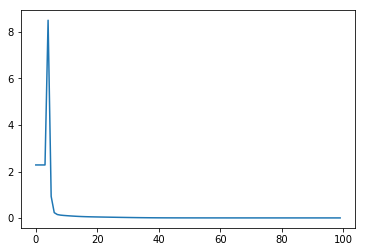

In [31]:
plt.plot(list(range(len(costs))), costs)

In [33]:
y_pred = [int(_predict(X[i], W)) for i in range(num_samples)]

In [42]:
false_prediction = []
for j, k in enumerate(y_pred == y):
    if (k == False):
        false_prediction.append(j)

In [37]:
y[0]

0

In [44]:
len(false_indices)

26

In [47]:
(1 - len(false_indices) / num_samples) * 100

92.77777777777779

In [48]:
false_indices[0]

76

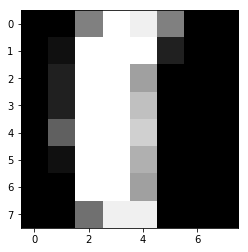

In [50]:
plt.imshow(X[76].reshape(8, 8), cmap=plt.cm.gray)

In [51]:
def imshow(X):
    plt.imshow(X.reshape(8, 8), cmap=plt.cm.gray)

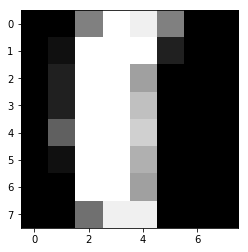

In [52]:
imshow(X[76])

In [60]:
# Perform prediction using existing weight
y_pred = [int(_predict(X[i], W)) for i in range(num_samples)]

# Get the images where prediction failed
false_prediction = []
for j, k in enumerate(y_pred == y):
    if (k == False):
        false_prediction.append(j)

print("Accuracy: {}".format((1 - len(false_prediction) / num_samples) * 100))

Accuracy: 92.77777777777779


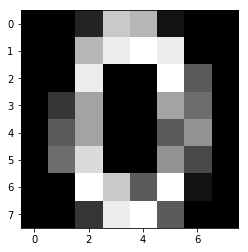

In [58]:
imshow(X[300])

In [59]:
int(_predict(X[300], W))

0

In [63]:
false_prediction = [ for j, k in enumerate(y_pred == y) 
    if (k == False):
        false_prediction.append(j)]

SyntaxError: invalid syntax (<ipython-input-63-5712b7c46106>, line 1)

In [70]:
W = np.ones(64)

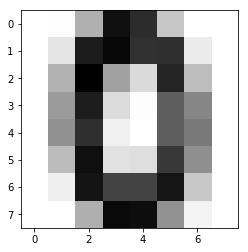

In [73]:
imshow(W)

In [74]:
y[0]

0

In [85]:
# Sigmoid
def sigmoid(z):
    return 1.00 / ( 1 + np.exp(-z))
  
def predict(X, W):
    return sigmoid(np.dot(X, W))

def computeGradient(X, y, W):
    yHat = predict(X, W)
    return np.dot(y - yHat, X)
  
def computeCost(X, y, W):
    yHat = np.clip(predict(X, W), 0.01, 0.99)
    first_term = y * np.log(yHat)
    second_term = (1 - y) * np.log(1 - yHat)
    log_loss = - np.mean(first_term + second_term)
    return log_loss

In [90]:
# Implementation of gradient ascent
W = np.ones(image_size)
costs = []
iteration = 100
lr = .0001
print("COST : {}".format(computeCost(X, y, W)))
for i in range(iteration):
    gradW = computeGradient(X, y, W)
    W = W  + lr * gradW
    print("COST : {}".format(computeCost(X, y, W)))

COST : 2.282081817308937
COST : 2.282081817308937
COST : 2.282081817308937
COST : 2.282081817308937
COST : 2.282081817308937
COST : 2.2639490180198223
COST : 0.036295980559656896
COST : 0.03602449147879831
COST : 0.03585169111547461
COST : 0.03574005238692662
COST : 0.03566711071934417
COST : 0.03541104616128434
COST : 0.03427061749075769
COST : 0.03316113699242106
COST : 0.032084669410857955
COST : 0.031033896960925508
COST : 0.030017367840941254
COST : 0.02904647604900243
COST : 0.027924887036701602
COST : 0.026039339875710502
COST : 0.024271209469837393
COST : 0.02263676336841257
COST : 0.021145749481444095
COST : 0.01980039720187816
COST : 0.018596601456875944
COST : 0.017526374380336256
COST : 0.01658021089387323
COST : 0.01574853024467215
COST : 0.015022124717816462
COST : 0.01439200633853269
COST : 0.013849113000617263
COST : 0.013384176363069544
COST : 0.012987836684043392
COST : 0.012650930029442608
COST : 0.01236481601480396
COST : 0.012123537390233032
COST : 0.01191934249224

In [91]:
ypred = predict(X, W)

In [93]:
ypred = [int(y) for y in ypred]

In [95]:
y[1]

1

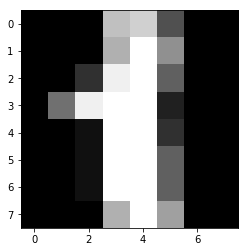

In [96]:
imshow(X[1])